# Model Interpretability


1.Name: Sanika Patne

2.NUID: 001099125

# Abstract


The goal was to construct a regression model, a classifier model and using H20 AutoML to determine the best model for the choosen dataset. After building these models SHAP Analysis should be done all those models. By doing this, SHAP values are obtained and then compared with other model interpretability models. It is generally believed that it’s impossible to precisely predict the price of house as it depends on various factors. For this dataset price is the dependent variable and others are independent variables. First, major factors affecting the housing prices should be selected. Then, a model for housing price prediction should be established from linear regression and random forest(classifier tree based model). That should be applied to the Melbourne housing dataset to test the models. Through the data analysis and test it can be summarized that the linear regression model and random forest classifier can effectively predict and analyze the housing price to some extent, while the algorithm can still be improved through more advanced machine learning methods.

#Dataset


This is a  static snapshot of a dataset created by Tony Pino.

It was scraped from publicly available results posted every week from Domain.com.au. He cleaned it well, and now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.<br>
Notes on Specific Variables
Rooms: Number of rooms<br>
Price: Price in dollars<br>
Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.<br>
Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.<br>
SellerG: Real Estate Agent<br>
Date: Date sold<br>
Distance: Distance from CBD<br>
Regionname: General Region (West, North West, North, North east …etc)<br>
Propertycount: Number of properties that exist in the suburb.<br>
Bedroom2 : Scraped # of Bedrooms (from different source)<br>
Bathroom: Number of Bathrooms<br>
Car: Number of carspots<br>
Landsize: Land Size<br>
BuildingArea: Building Size<br>
CouncilArea: Governing council for the area

# Installing and Importing required libraries

In [173]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [174]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [175]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Reading and Analyzing Dataset

In [176]:
data = pd.read_csv("https://github.com/Sanikap05/DataScience/raw/main/sample.csv")

In [177]:
data.head()

Suburb  Address  Rooms  Type  Price  Method  SellerG  Date  Distance  \
0       0     2790      1     0    839       1       18    41        12   
1       0     4520      2     0   1118       3       18    42        12   
2       0     4882      3     0   1174       4      112    43        12   
3       0     1027      2     0   1291       1      112    46        12   
4       0     6101      1     0   1193       1      112    50        12   

   Postcode  ...  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
0        50  ...         0    0       110            85         23   
1        50  ...         1    0        88           224         23   
2        50  ...         0    2        74           212        130   
3        50  ...         1    0       198           313         32   
4        50  ...         0    2       209           143         17   

   CouncilArea  Lattitude  Longtitude  Regionname  Propertycount  
0           29       1712        1839           2            135  
1           29       1690        1854           2            135  
2           29       1722        1851           2            135  
3           29       1788        1932           2            135  
4           29       1737        1869           2            135  

[5 rows x 21 columns]

In [178]:
data.shape

(6196, 21)

In [179]:
#taking the basic information of all the columns in the given dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6196 entries, 0 to 6195
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Suburb         6196 non-null   int64
 1   Address        6196 non-null   int64
 2   Rooms          6196 non-null   int64
 3   Type           6196 non-null   int64
 4   Price          6196 non-null   int64
 5   Method         6196 non-null   int64
 6   SellerG        6196 non-null   int64
 7   Date           6196 non-null   int64
 8   Distance       6196 non-null   int64
 9   Postcode       6196 non-null   int64
 10  Bedroom2       6196 non-null   int64
 11  Bathroom       6196 non-null   int64
 12  Car            6196 non-null   int64
 13  Landsize       6196 non-null   int64
 14  BuildingArea   6196 non-null   int64
 15  YearBuilt      6196 non-null   int64
 16  CouncilArea    6196 non-null   int64
 17  Lattitude      6196 non-null   int64
 18  Longtitude     6196 non-null   int64
 19  Region

In [180]:
X=data.drop(['Price'],axis=1)
y=data['Price']

In [181]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=42)

In [182]:
#Calculating VIF 
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]
  
print(vif_data)

          feature        VIF
0          Suburb   3.971947
1         Address   4.008772
2           Rooms  53.756730
3            Type   3.095120
4          Method   2.585650
5         SellerG   3.769657
6            Date   4.125136
7        Distance   7.626206
8        Postcode   8.192933
9        Bedroom2  94.086678
10       Bathroom   3.464902
11            Car   5.312394
12       Landsize   3.924441
13   BuildingArea  13.088665
14      YearBuilt  10.525404
15    CouncilArea   3.786261
16      Lattitude   7.911781
17     Longtitude  10.823703
18     Regionname   6.559713
19  Propertycount   8.062638


In [183]:
cols= ['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date','Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize','BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount']
model = sm.OLS(y_train,sm.add_constant(X_train[cols])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     936.5
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        03:14:47   Log-Likelihood:                -32863.
No. Observations:                4956   AIC:                         6.577e+04
Df Residuals:                    4935   BIC:                         6.590e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           771.1710     27.940     27.601

In [184]:
#Dropping columns causing multicollinearity or those who are unimportant for prediction of Price
data=data.drop(['Address','Bedroom2','Date'],axis=1)

Text(0.5, 1.0, 'Variable Correlation')

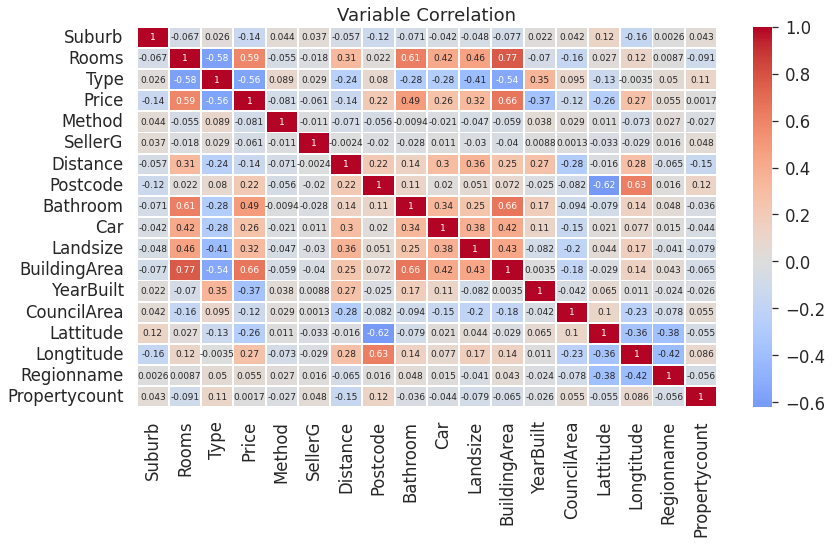

In [185]:
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(13,7))

sns.heatmap(data.corr(),center=0, linewidths=0.9,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

# Performing Linear Regression

In [186]:
#Computing Linear Regression model for Melbourne dataset
def linear_reg(X_train,y_train,X_test,y_test):
    linear_reg = LinearRegression()
    linear_reg_model = linear_reg.fit(X_train,y_train)
    print('Train set')
    pred=linear_reg_model.predict(X_train)
    print('Linear Regression Mean Squared error :{}'.format(mean_squared_error(y_train,pred)))
    print('Linear Regression r2_score :{}'.format(r2_score(y_train,pred)))
    print('Test set')
    pred=linear_reg_model.predict(X_test)
    model_lr=linear_reg_model.predict(X_test)
    print('Linear Regression Mean Squared error :{}'.format(mean_squared_error(y_test,pred)))
    print('Linear Regression r2_score :{}'.format(r2_score(y_test,pred))) 

In [187]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [188]:
cols1= ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Distance', 'Postcode','Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname','Propertycount']

In [189]:
#Computing R2 for testing and training data
linear_reg(X_train[cols1],y_train,X_test[cols1],y_test)

Train set
Linear Regression Mean Squared error :33658.61845667005
Linear Regression r2_score :0.7914411252916436
Test set
Linear Regression Mean Squared error :33481.48528671175
Linear Regression r2_score :0.7956522564362271


# SHAP Analysis on Linear Regression model

SHAP values for each feature represent the change in the expected model prediction when conditioning on that feature. For each feature, SHAP value explains the contribution to explain the difference between the average model prediction and the actual prediction of the instance.The essence of Shapley value is to measure the contributions to the final outcome from each player separately among the coalition, while preserving the sum of contributions being equal to the final outcome.SHAP values in model explanation can measure the input features contribution to individual predictions.

In [190]:
%%capture
!pip install shap
import shap 

In [191]:
import shap
shap.initjs()

In [192]:
# Giving input as 1% of whole dataset as SHAP cant handle large dataset
X = X_train.sample(frac=0.01,random_state=200)
#LinearExplainer is used as linear regression model is used
explainer = shap.LinearExplainer(model, X, feature_perturbation="interventional") 
shap_values = explainer.shap_values(X) #Saving SHAP values

In [193]:
#Initialize java script
shap.initjs()

 #Explain one row in the data with the
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [194]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X)  

In [195]:
#Initializing explainer from shap, lm is our trained model
explainer_shap=shap.LinearExplainer(model=model, masker=X_train)

#Computing shap values for train dataset
shap_values = explainer_shap.shap_values(X_train)

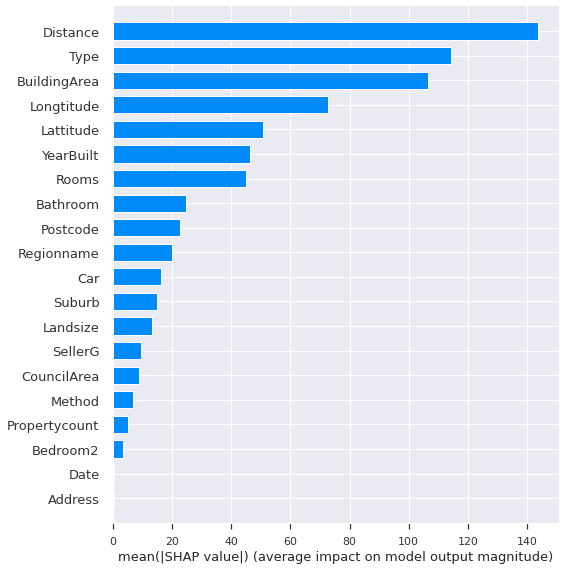

In [196]:
shap.summary_plot(shap_values, X, plot_type="bar")

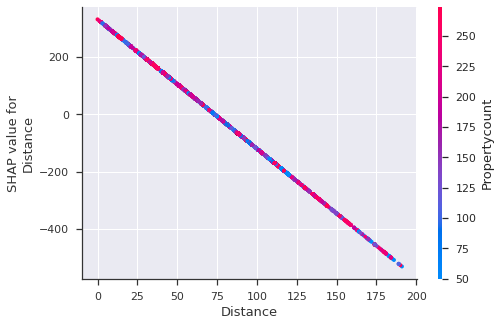

In [197]:
shap.dependence_plot("Distance", shap_values, X_train)

In [198]:
from sklearn.linear_model import LinearRegression
import shap

# train Linear model
#Seperating the dependent and independent variable from the main dataset
X=data.drop(['Price'],axis=1)
y=data['Price']
regressor = LinearRegression()
linear_reg = regressor.fit(X, y)

# compute SHAP values
explainer = shap.Explainer(linear_reg, X)
shap_values = explainer(X)

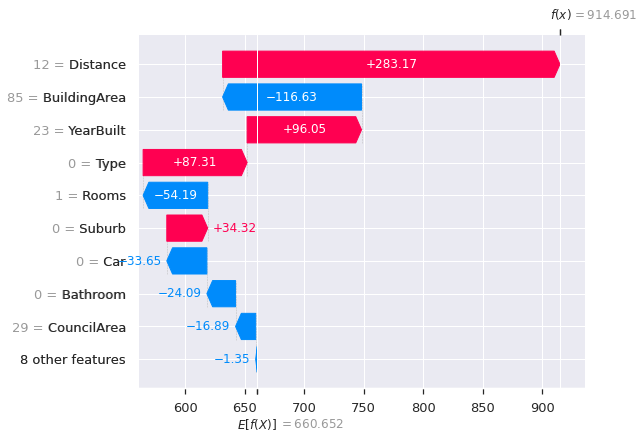

In [199]:
shap.plots.waterfall(shap_values[0])

For the linear regression model from the plots it can be interpreted that distance, building area and Type are the important features for this regressor model. These are the makjor features in determining the Price of the house.

# Performing Random Forest 

In [200]:
def ramdomforest(X_train,y_train,X_test,y_test):
    rf = RandomForestRegressor()
    rf_model = rf.fit(X_train,y_train)
    print('Train set')
    pred=rf_model.predict(X_train)
    print('ramdomforest Mean Squared error :{}'.format(mean_squared_error(y_train,pred)))
    print('ramdomforest r2_score :{}'.format(r2_score(y_train,pred)))
    print('Tesst set')
    pred=rf_model.predict(X_test)
    print('ramdomforest Mean Squared error :{}'.format(mean_squared_error(y_test,pred)))
    print('ramdomforest r2_score :{}'.format(r2_score(y_test,pred)))

random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train) 

RandomForestRegressor()

In [201]:
ramdomforest(X_train[cols1],y_train,X_test[cols1],y_test)

Train set
ramdomforest Mean Squared error :2561.5479934977075
ramdomforest r2_score :0.9841278819056977
Tesst set
ramdomforest Mean Squared error :18997.224063880916
ramdomforest r2_score :0.884054132061752


# SHAP Analysis on Random Forest Model


In [202]:
%%capture
!pip install shap
import shap 

In [203]:
# Giving input as 1% of whole dataset as SHAP cant handle large dataset
X = X_train.head(10)
 # Using Tree explainer as this is tree based classifier model
explainer = shap.TreeExplainer(random_forest)
#Saving shap values
shap_values = explainer.shap_values(X) 

In [204]:
shap.initjs() #Initialize java script
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:]) #Explain one row in the data with the model

In [205]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X)  

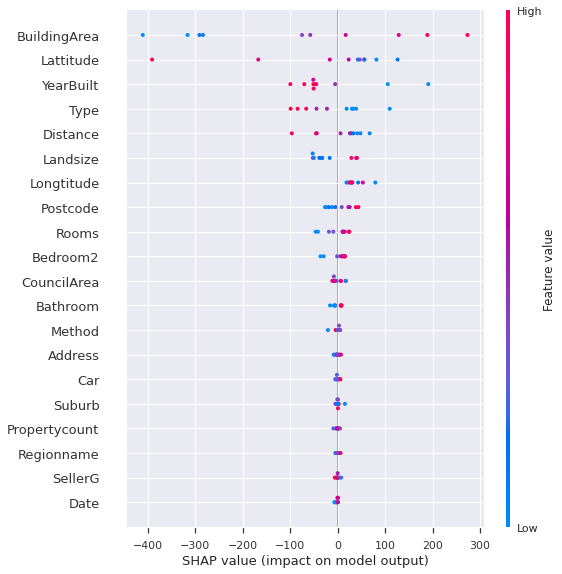

In [206]:
shap.initjs()
shap.summary_plot(shap_values, X) 

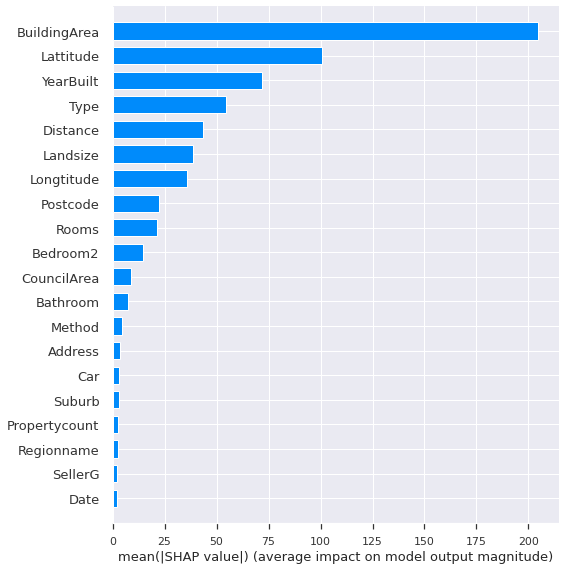

In [207]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [208]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
iris = load_iris()

model_rf1 = RandomForestRegressor(n_estimators=10)
# Train
model_rf1.fit(iris.data, iris.target)
# Extract single tree
estimator = model_rf1.estimators_[5]

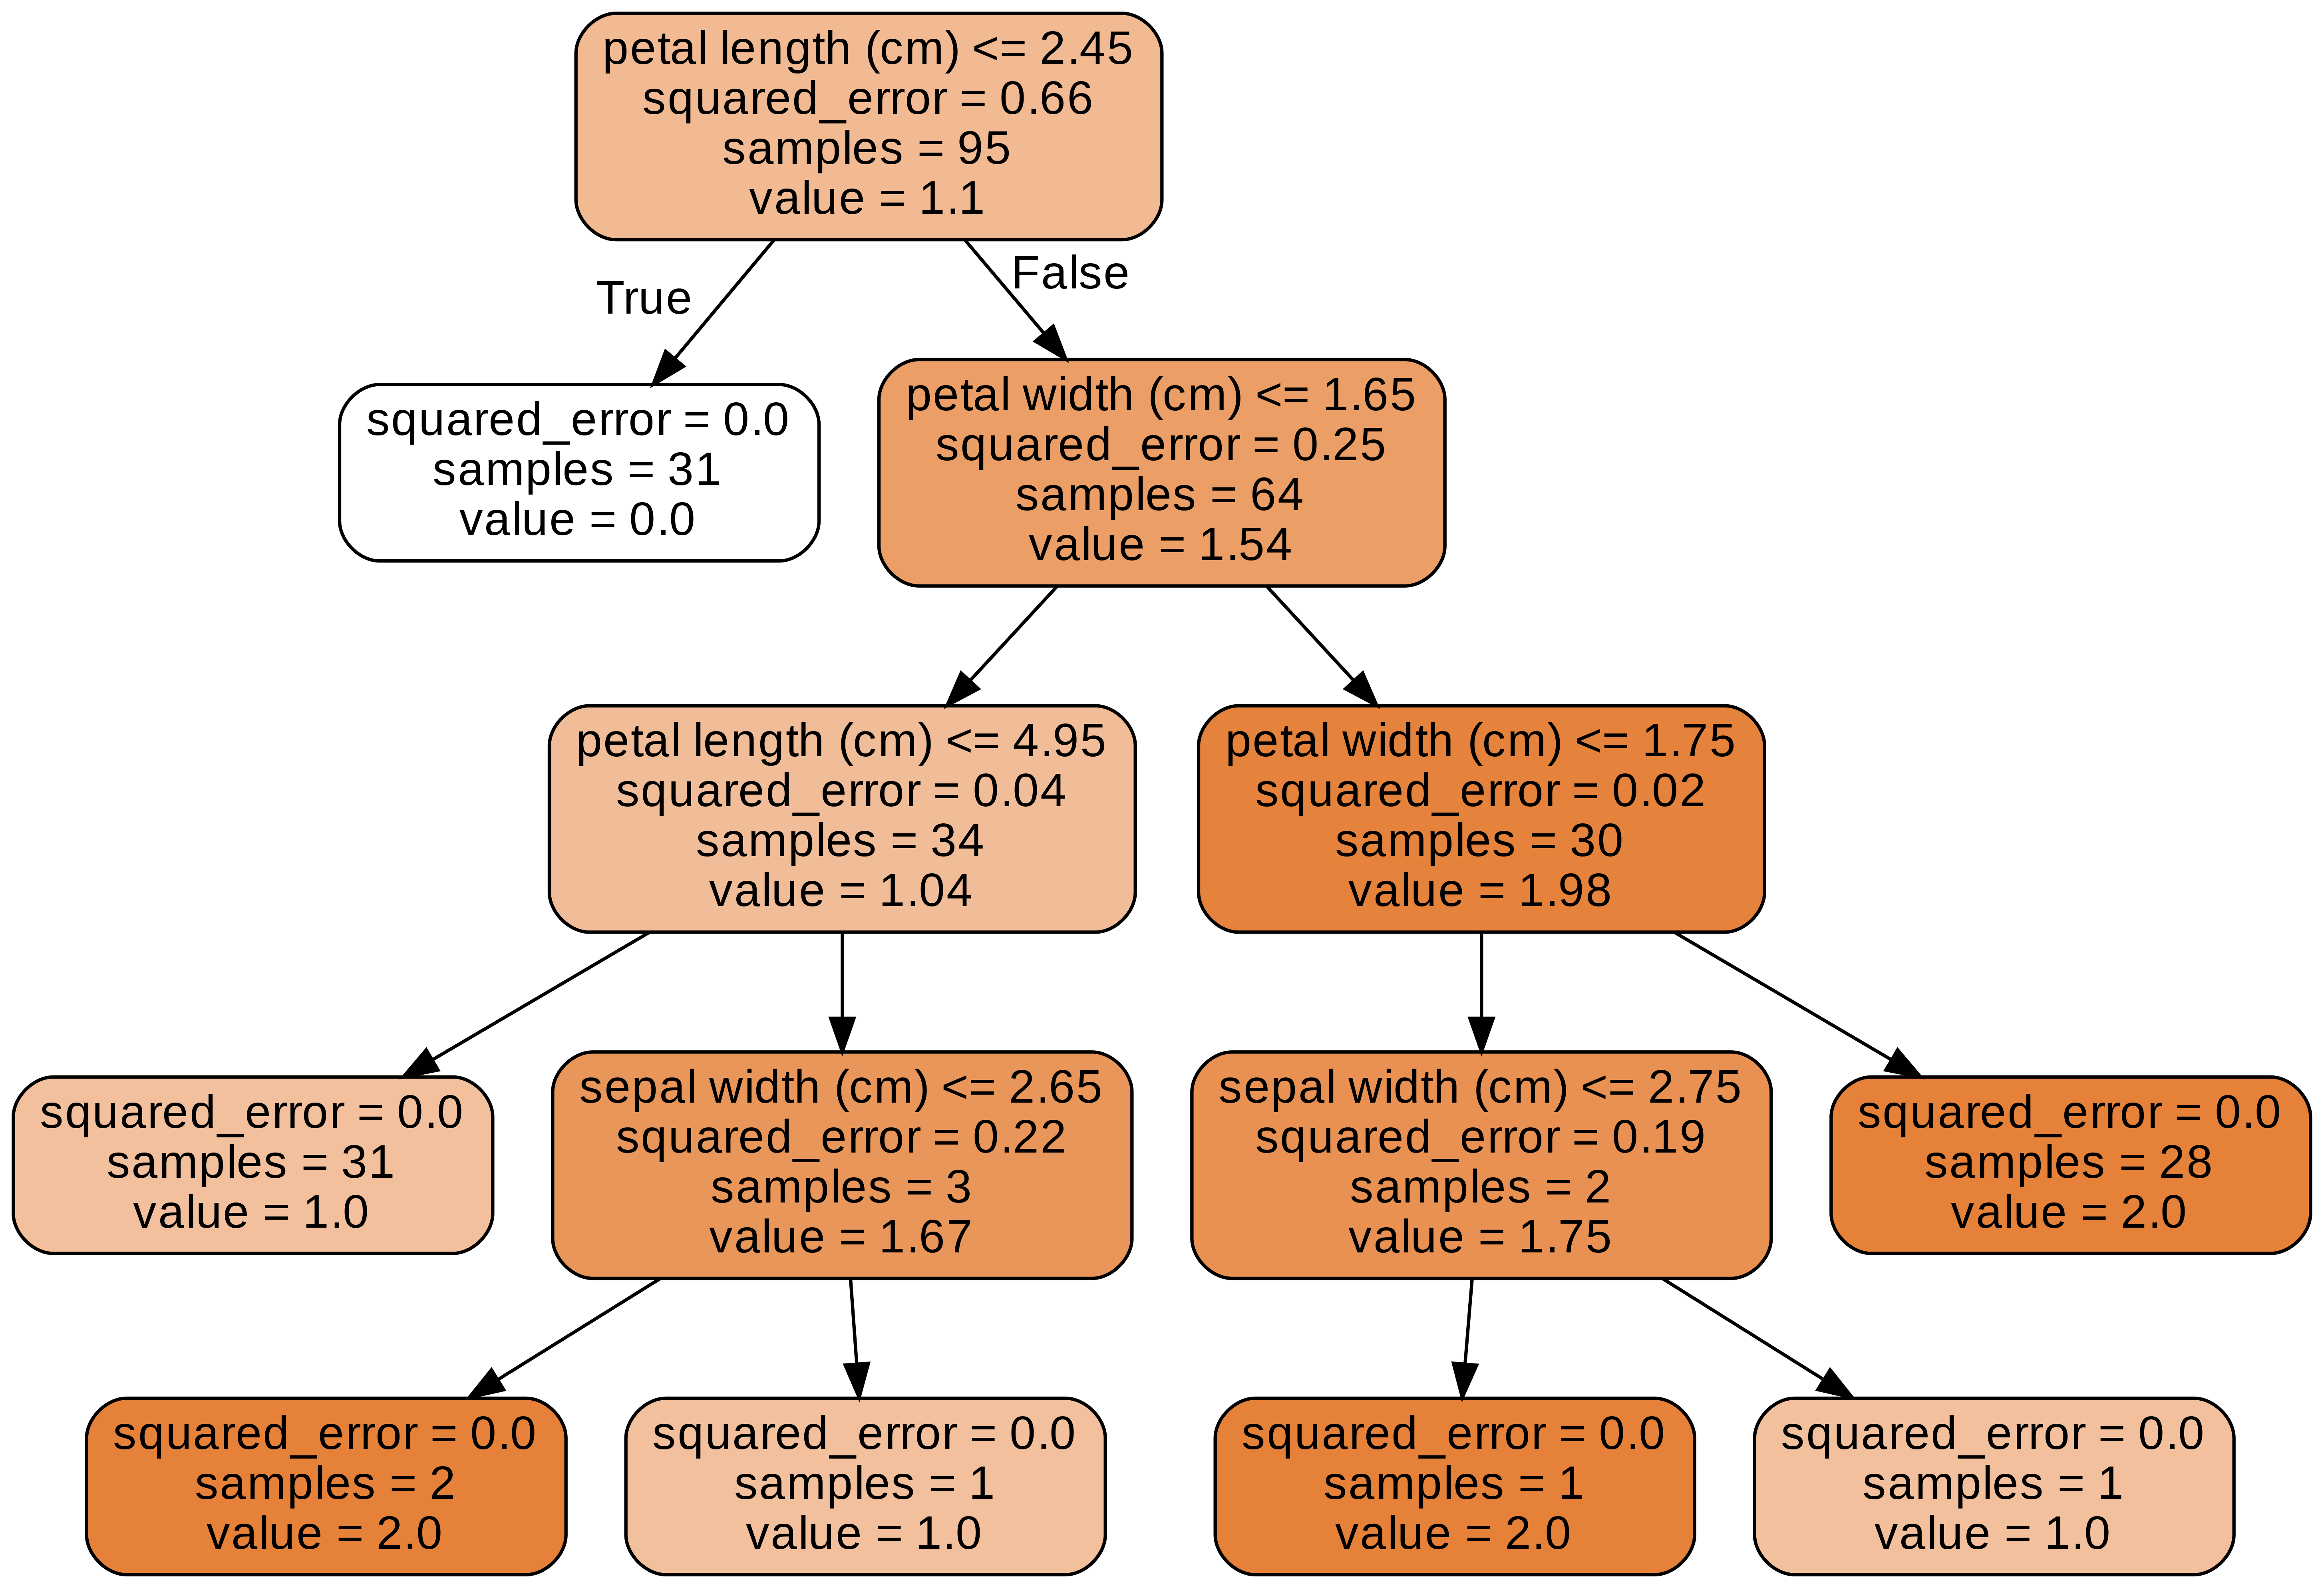

In [209]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in colab notebook
from IPython.display import Image
Image(filename = 'tree.png')

For the random forest model according to SHAP Analysis the important features to determine the target variable 'Price' are BuildingArea, Latitude and YearBuilt. BuildingArea is the common feature which is important for both Random Forest and Linear Regression Model. BuildingArea has the highest value of feature importance and is placed first on the scale.

# Using AutoML to identify best model

In [210]:
#importing all the necessary libraries

import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import numpy as np
import scipy

In [211]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6 
run_time=222

In [212]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

5


In [213]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:7338 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.14.1" 2022-02-08; OpenJDK Runtime Environment (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_oqycp44
  JVM stdout: /tmp/tmp_oqycp44/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp_oqycp44/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:7338
Connecting to H2O server at http://127.0.0.1:7338 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.36.1.1
H2O_cluster_version_age:    11 days
H2O_cluster_name:           H2O_from_python_unknownUser_tw7vt8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    5 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:7338
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.7.13 final
--------------------------  ----------------------------------

In [214]:
# Create a 80/20 train/test split
url = "https://github.com/Sanikap05/DataScience/raw/main/sample.csv"
df = h2o.import_file(path = url)
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [215]:
# Set the features and target
X=df.columns
print(X)

y ='Price'
X.remove(y) 
print(X)

['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']
['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']


In [216]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)
# Passing the training and testing dataset through H20 AutomML
aml.train(x=X,y=y,training_frame=df_train) 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_3_AutoML_1_20220425_31554

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 3772.761017860939
RMSE: 61.422805356487416
MAE: 45.25509896373941
RMSLE: NaN
R^2: 0.9765362636156468
Mean Residual Deviance: 3772.761017860939
Null degrees of freedom: 4995
Residual degrees of freedom: 4984
Null deviance: 803312555.8724985
Residual deviance: 18848714.04523325
AIC: 55348.90346363799

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 16023.442777936898
RMSE: 126.58373820494045
MAE: 92.67584124267357
RMSLE: NaN
R^2: 0.9003462356795544
Mean Residual Deviance: 16023.442777936898
Null degrees of freedom: 4995
Residual degrees of freedom: 4983
Null deviance: 803443140.5902069
Residual deviance: 80053120.11857

mean            sd    cv_1_valid  \
0                     mae  9.270435e+01  2.209940e+00  9.067052e+01   
1  mean_residual_deviance  1.604095e+04  1.255299e+03  1.459148e+04   
2                     mse  1.604095e+04  1.255299e+03  1.459148e+04   
3           null_deviance  1.606886e+08  4.026794e+06  1.633990e+08   
4                      r2  9.001651e-01  9.242290e-03  9.072813e-01   
5       residual_deviance  1.601062e+07  1.147904e+06  1.513136e+07   
6                    rmse  1.265762e+02  4.925555e+00  1.207952e+02   
7                   rmsle           NaN  0.000000e+00           NaN   

     cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid  
0  9.236371e+01  9.064011e+01  9.568876e+01  9.415865e+01  
1  1.528670e+04  1.596907e+04  1.789948e+04  1.645801e+04  
2  1.528670e+04  1.596907e+04  1.789948e+04  1.645801e+04  
3  1.656886e+08  1.575466e+08  1.559339e+08  1.608750e+08  
4  9.054303e-01  8.994034e-01  8.844753e-01  9.042354e-01  
5  1.566887e+07  1.584132e+07  1.800688e+07  1.540469e+07  
6  1.236394e+02  1.263688e+02  1.337889e+02  1.282888e+02  
7           NaN           NaN           NaN           NaN

In [217]:
print(aml.leaderboard)

model_id rmse mse mae rmsle mean_residual_deviance 
 
 
 StackedEnsemble_AllModels_3_AutoML_1_20220425_31554 126.584 16023.4 92.6758 nan 16023.4 
 StackedEnsemble_AllModels_2_AutoML_1_20220425_31554 127.2 16179.9 93.1491 nan 16179.9 
 StackedEnsemble_AllModels_1_AutoML_1_20220425_31554 127.617 16286.2 93.5279 nan 16286.2 
 StackedEnsemble_BestOfFamily_3_AutoML_1_20220425_31554 128.767 16581 94.6804 nan 16581 
 StackedEnsemble_BestOfFamily_2_AutoML_1_20220425_31554 129.534 16779.2 95.3504 nan 16779.2 
 GBM_2_AutoML_1_20220425_31554 130.9 17134.9 96.8954 nan 17134.9 
 StackedEnsemble_BestOfFamily_1_AutoML_1_20220425_31554 131.189 17210.5 96.7023 nan 17210.5 
 GBM_3_AutoML_1_20220425_31554 131.849 17384.1 97.4512 nan 17384.1 
 GBM_4_AutoML_1_20220425_31554 131.852 17384.9 97.1401 nan 17384.9 
 GBM_5_AutoML_1_20220425_31554 132.457 17544.8 98.5589 nan 17544.8

In [218]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'GBM_2_AutoML_1_20220425_31554': 5,
 'GLM_1_AutoML_1_20220425_31554': 26,
 'StackedEnsemble_AllModels_1_AutoML_1_20220425_31554': 2,
 'StackedEnsemble_AllModels_2_AutoML_1_20220425_31554': 1,
 'StackedEnsemble_AllModels_3_AutoML_1_20220425_31554': 0,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20220425_31554': 4,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20220425_31554': 3}

In [219]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

5


In [220]:
#Printing the best model
print("The best model is - " , best_model.algo)

The best model is -  gbm


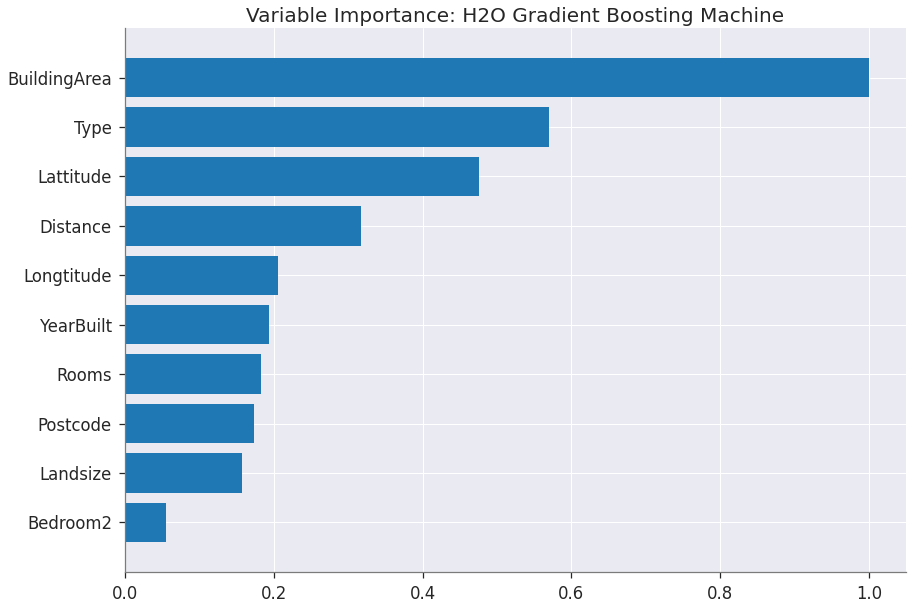

<Figure size 432x288 with 0 Axes>

In [221]:
#plot variables in order of their importance for price prediction
if best_model.algo in ['gbm','drf','xrt','xgboost']:
    best_model.varimp_plot()

26
glm


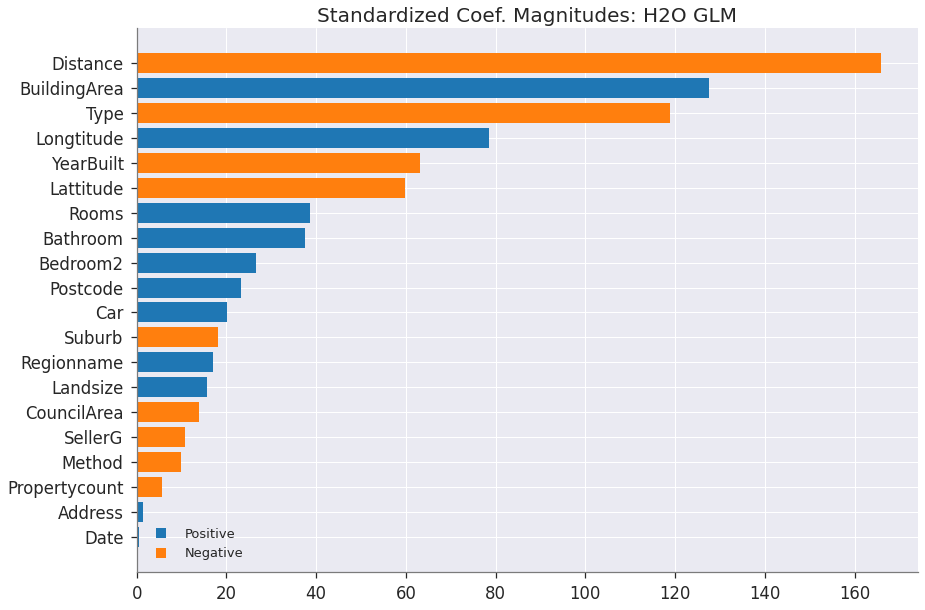

In [222]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

# SHAP Analysis on AutoML model

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id rmse mse mae rmsle mean_residual_deviance training_time_ms predict_time_per_row_ms algo 
 
 
 StackedEnsemble_AllModels_3_AutoML_1_20220425_31554 126.584 16023.4 92.6758 nan 16023.4 1167 0.196578 StackedEnsemble 
 StackedEnsemble_AllModels_2_AutoML_1_20220425_31554 127.2 16179.9 93.1491 nan 16179.9 718 0.146285 StackedEnsemble 
 StackedEnsemble_AllModels_1_AutoML_1_20220425_31554 127.617 16286.2 93.5279 nan 16286.2 925 0.104759 StackedEnsemble 
 StackedEnsemble_BestOfFamily_3_AutoML_1_20220425_31554 128.767 16581 94.6804 nan 16581 450 0.050715 StackedEnsemble 
 StackedEnsemble_BestOfFamily_2_AutoML_1_20220425_31554 129.534 16779.2 95.3504 nan 16779.2 452 0.045171 StackedEnsemble 
 GBM_2_AutoML_1_20220425_31554 130.9 17134.9 96.8954 nan 17134.9 2039 0.02124 GBM 
 StackedEnsemble_BestOfFamily_1_AutoML_1_20220425_31554 131.189 17210.5 96.7023 nan 17210.5 647 0.029653 StackedEnsemble 
 GBM_3_AutoML_1_20220425_31554 131.849 17384.1 97.4512 nan 17384.1 2069 0.028394 GBM 
 GBM_4_AutoML_1_20220425_31554 131.852 17384.9 97.1401 nan 17384.9 1619 0.024325 GBM 
 GBM_5_AutoML_1_20220425_31554 132.457 17544.8 98.5589 nan 17544.8 1077 0.021593 GBM 
 GBM_1_AutoML_1_20220425_31554 133.802 17902.8 98.9419 nan 17902.8 5040 0.036371 GBM 
 GBM_grid_1_AutoML_1_20220425_31554_model_2 134.195 18008.4 99.8623 nan 18008.4 1295 0.024528 GBM 
 GBM_grid_1_AutoML_1_20220425_31554_model_1 134.252 18023.5 100.042 nan 18023.5 2081 0.019517 GBM 
 XGBoost_3_AutoML_1_20220425_31554 136.385 18600.8 101.083 nan 18600.8 692 0.00343 XGBoost 
 XGBoost_grid_1_AutoML_1_20220425_31554_model_3 138.04 19055.1 102.927 nan 19055.1 1616 0.002897 XGBoost 
 DRF_1_AutoML_1_20220425_31554 140.801 19825 105.978 0.368094 19825 2916 0.009639 DRF 
 XGBoost_grid_1_AutoML_1_20220425_31554_model_4 141.746 20091.9 104.569 nan 20091.9 1299 0.004048 XGBoost 
 XRT_1_AutoML_1_20220425_31554 142.297 20248.3 107.429 0.382802 20248.3 3587 0.009355 DRF 
 XGBoost_grid_1_AutoML_1_20220425_31554_model_1 143.153 20492.9 106.799 nan 20492.9 540 0.00339 XGBoost 
 XGBoost_grid_1_AutoML_1_20220425_31554_model_2 144.296 20821.3 106.786 nan 20821.3 1528 0.006301 XGBoost

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

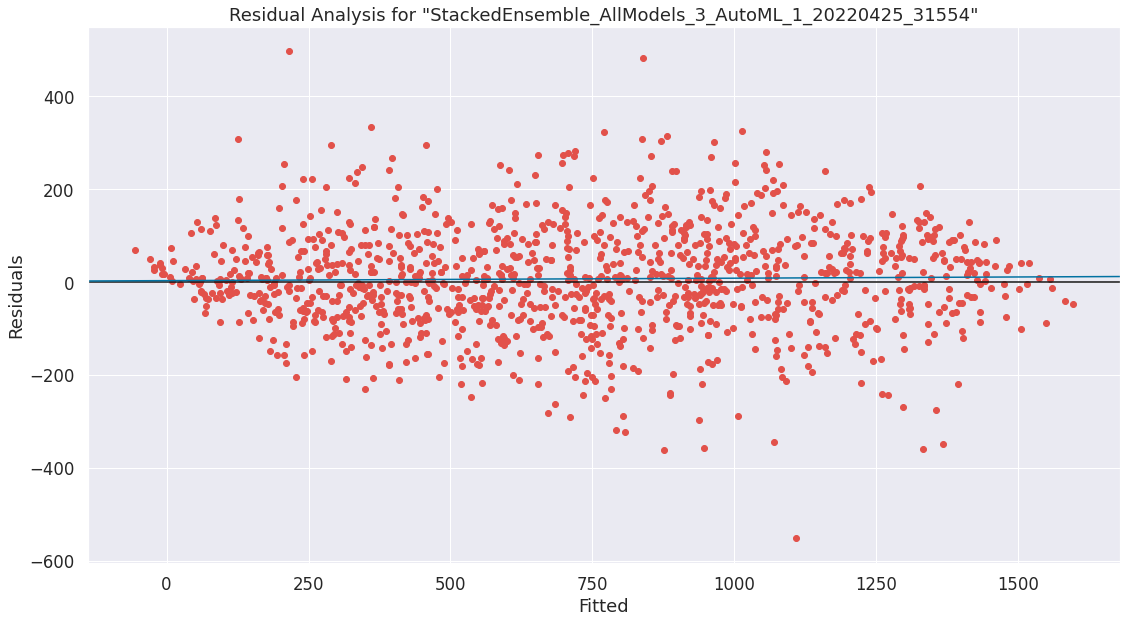

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

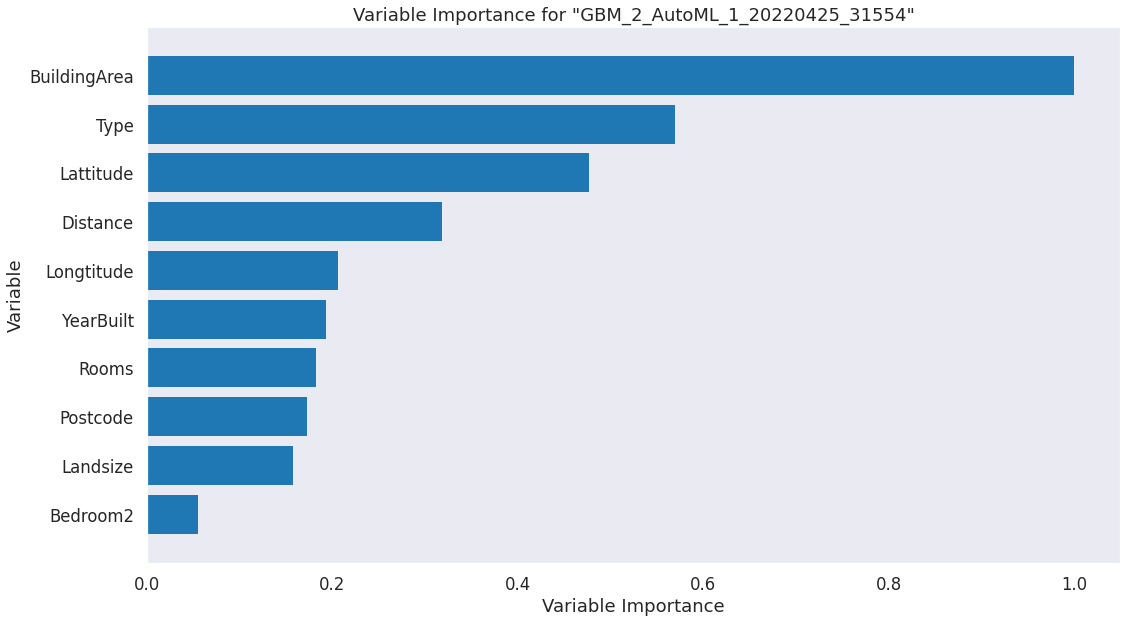

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

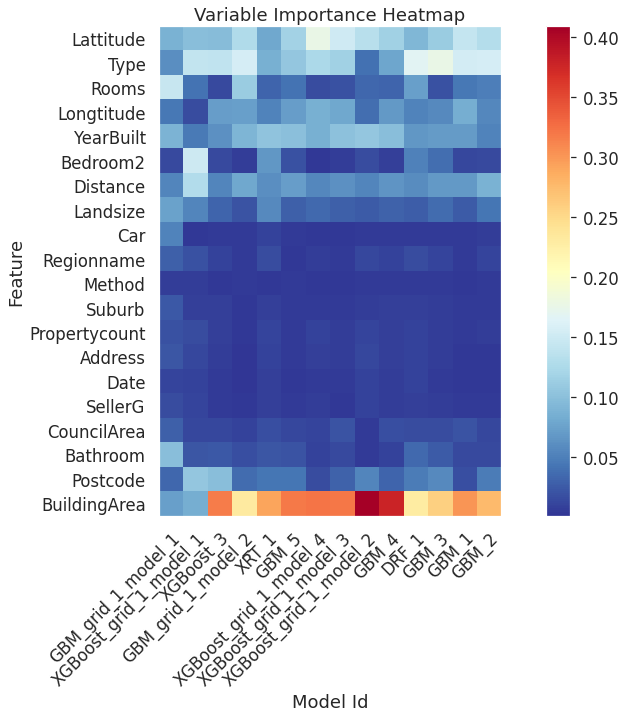

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

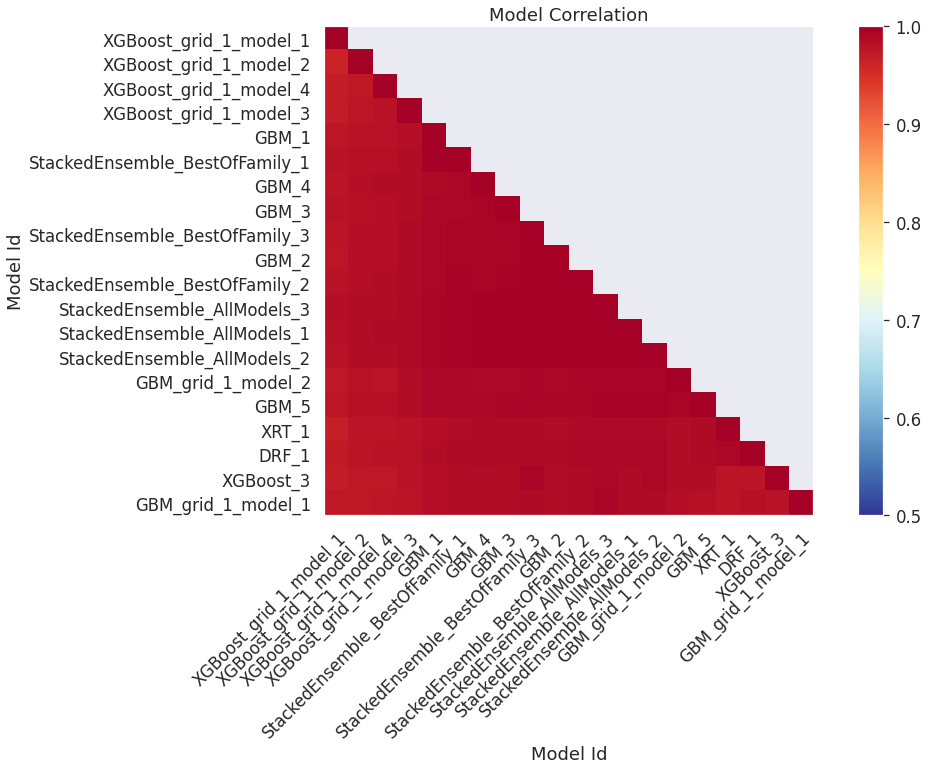

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

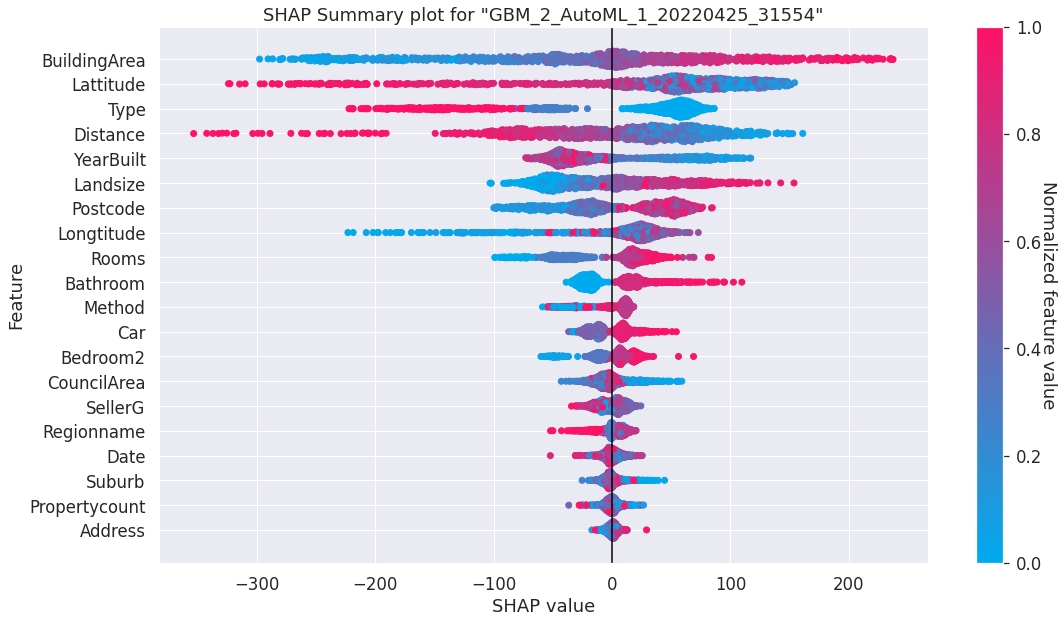

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

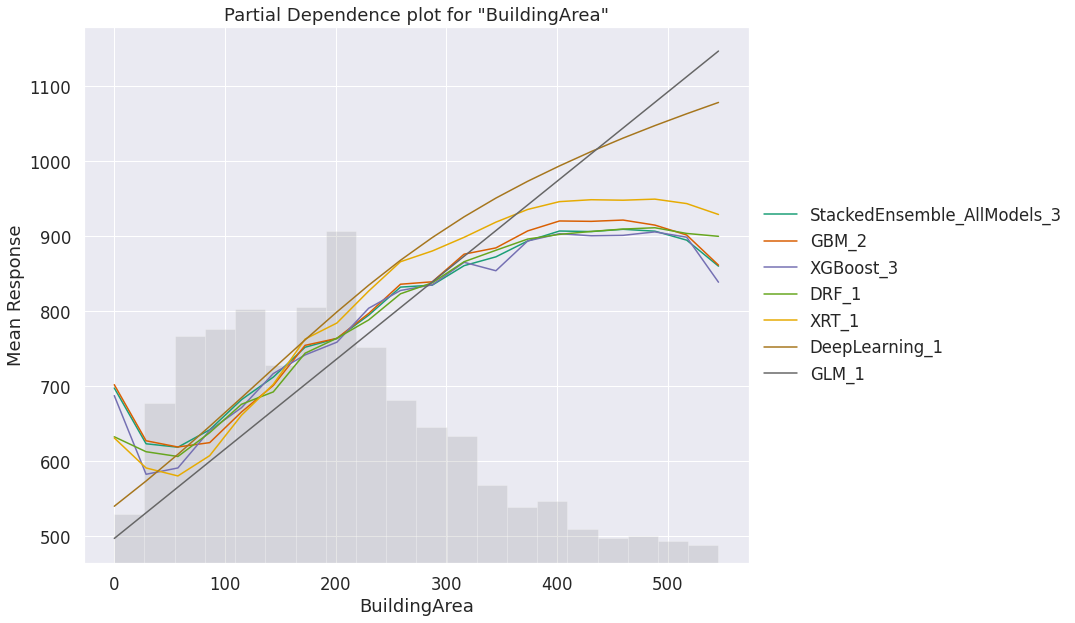

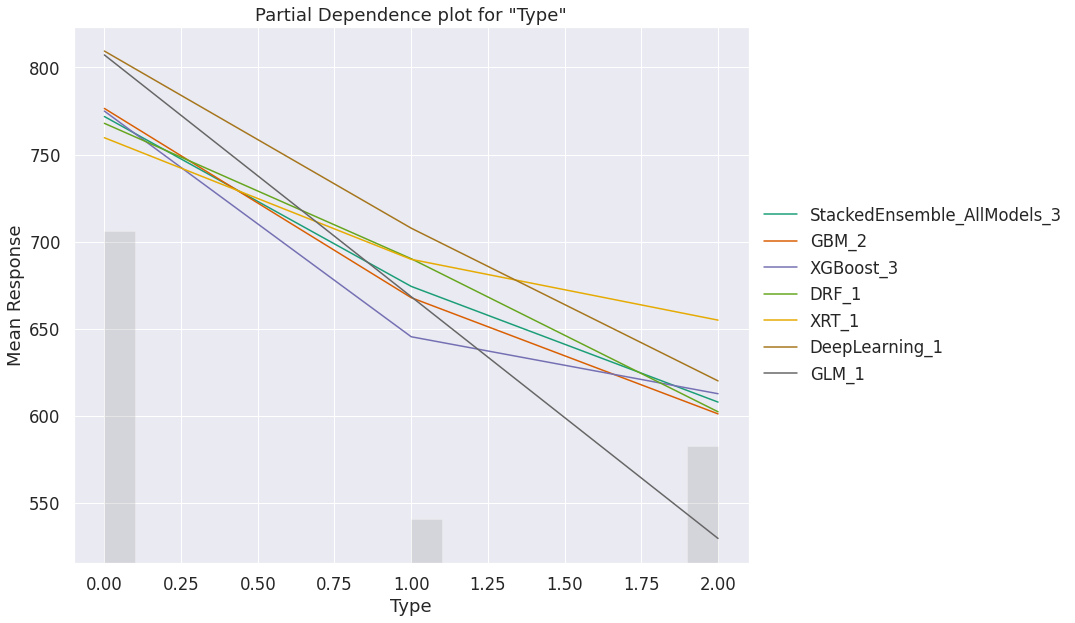

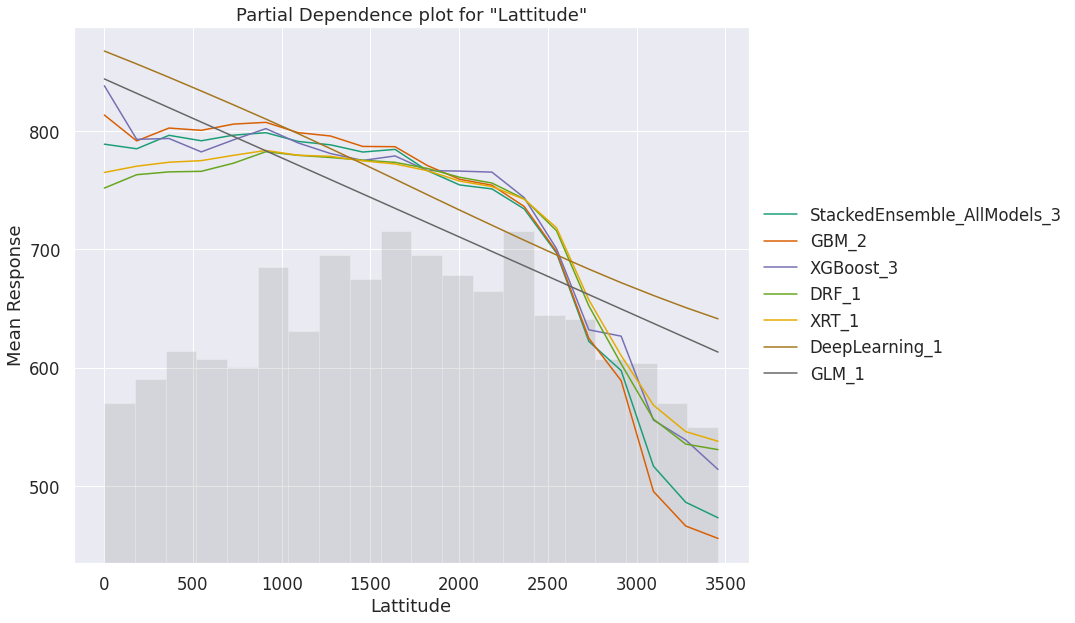

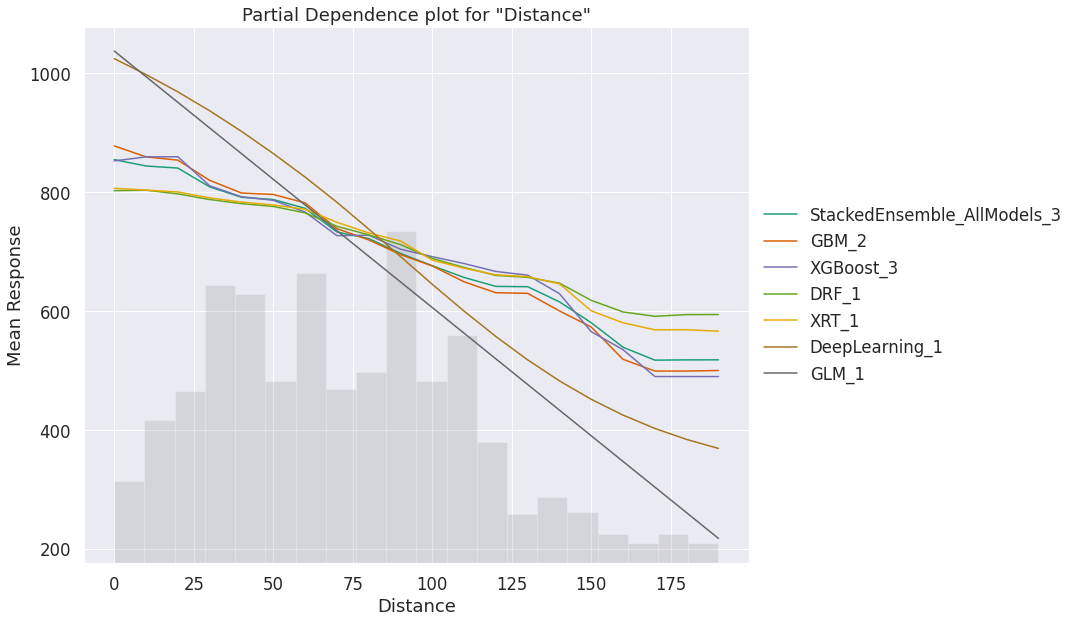

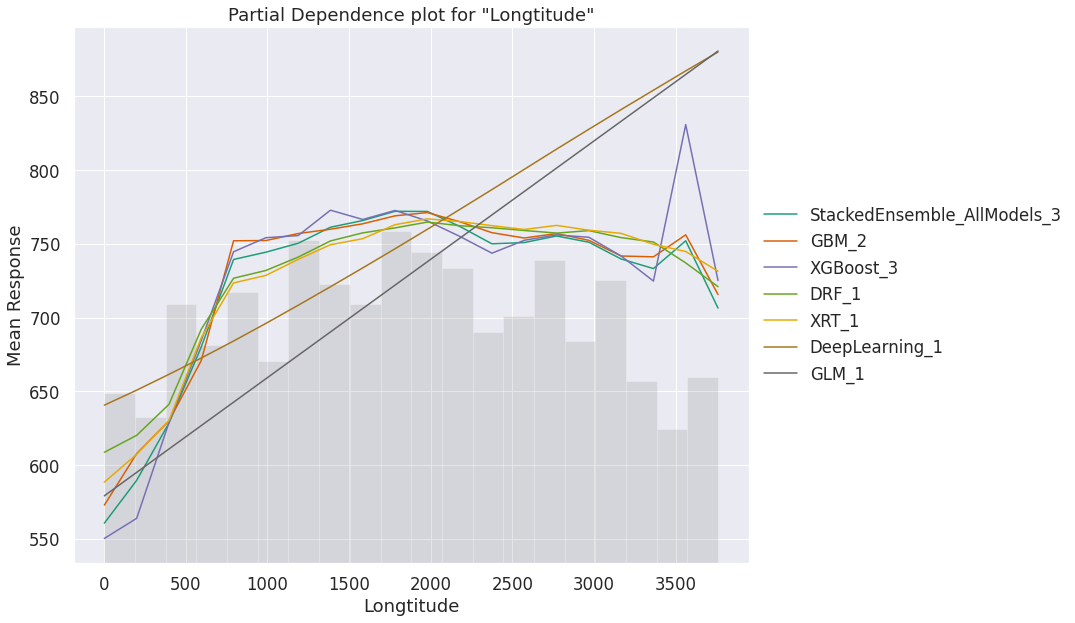

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

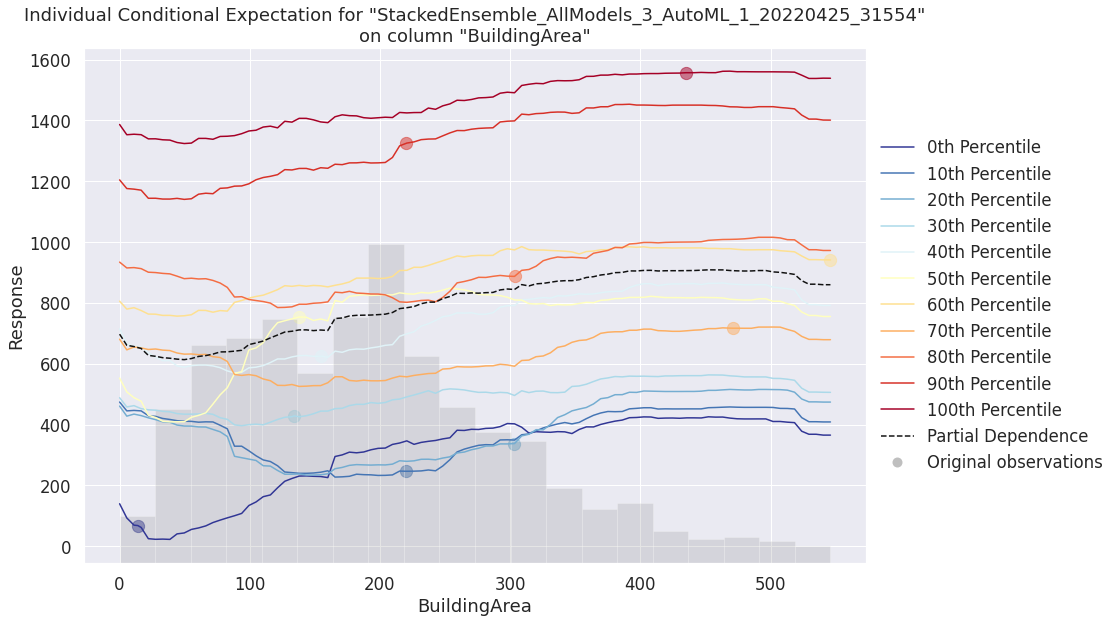

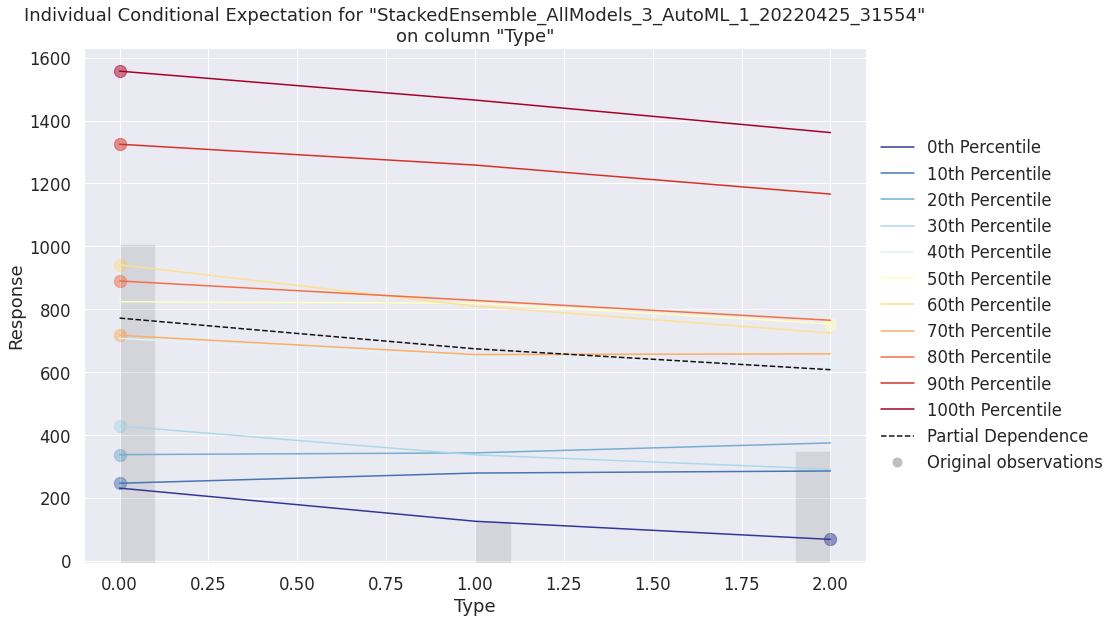

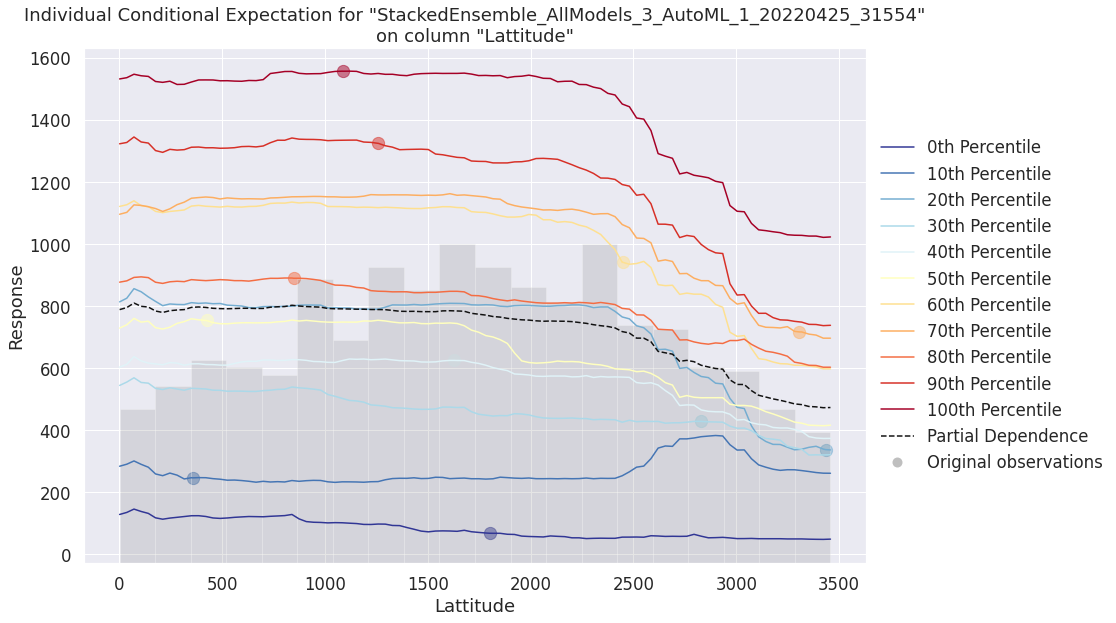

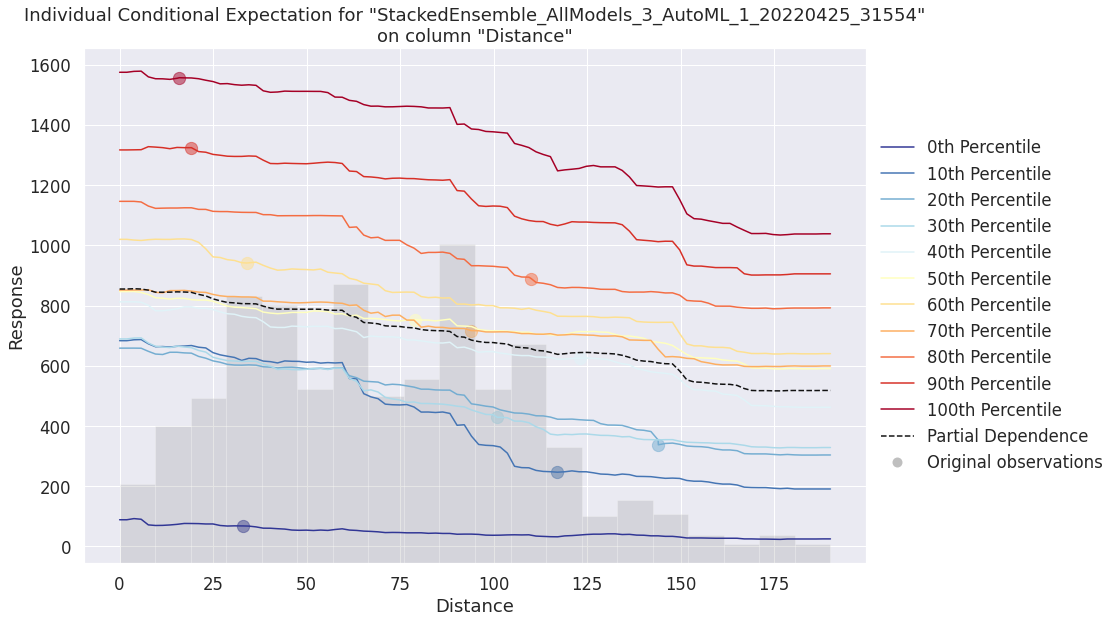

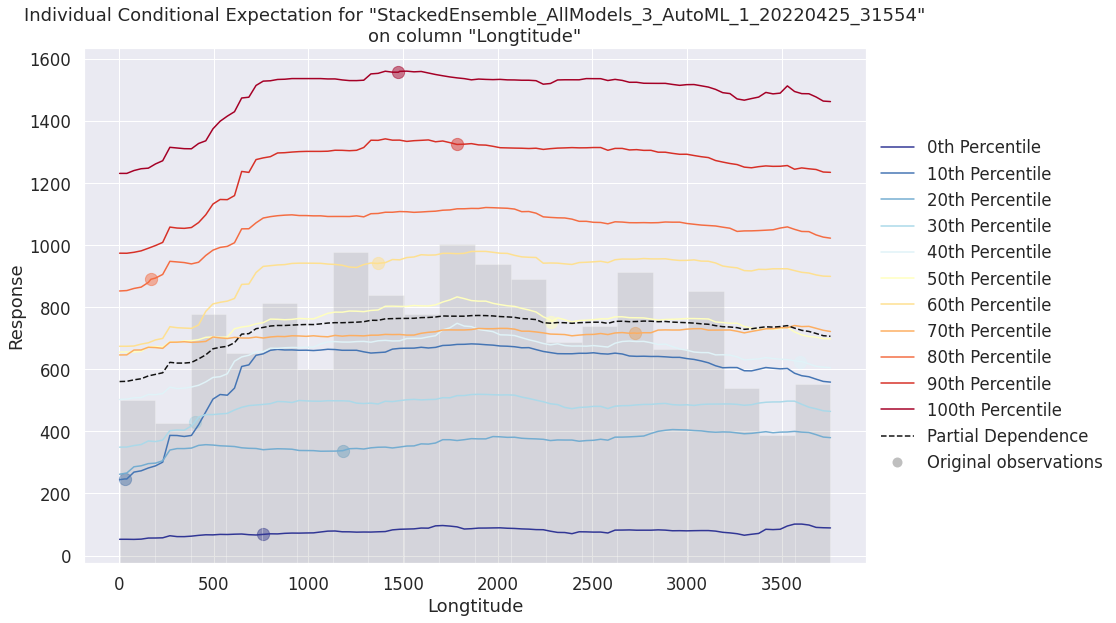

In [223]:
exa = aml.explain(df_test)

# Conclusion

For this dataset the best model according to AutoML is gbm. When a classifier like Rnadom Forest was implemented on this dataset it gave a better accuracy. The accuracy on testing data was 88.09 percent. On the other hand when Linear Regression was imolemented the accuracy for training data was 79.8 percent. After implementing these model I calculated SHAP values using SHAP analysis method. I plotted different plots like permutation plots, waterfall plot, feature importance bar chart and many more plots.

For each model, the important feature obtained were different. Among all these 3 models the best accuracy was obtained for random forest model.The important features for this model were BuildingArea, Latitude and YearBuilt. This means that for this model the target variable 'Price' is highly depended on BuildingArea, Latitude and YearBuilt.



# License

**MIT** License

Copyright (c) 2022 Sanika Patne

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

# References

OLS Model- http://net-informations.com/ds/mla/ols.html Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/ Kaggle Notebook- https://www.kaggle.com/stephaniestallworth/melbourne-housing-market-eda-and-regression Dataset- https://www.kaggle.com/dansbecker/melbourne-housing-snapshot
Random Forest Model- https://towardsdatascience.com/understanding-random-forest-58381e0602d2 and https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
SHAP Analysis- https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d and https://www.kaggle.com/code/dansbecker/shap-values/tutorial
Reference Notebook- https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb